## Installing Required Libraries

install tf-keras-vis library using "pip install tf-keras-vis"

In [1]:
# %tensorflow_version 1.x

In [2]:
# import necessary libraries and functions
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import InputLayer, Dense, Dropout, Flatten, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D

2023-11-28 18:33:34.146801: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 18:33:34.531523: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 18:33:34.531768: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 18:33:34.544554: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-28 18:33:34.605940: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 18:33:34.607553: I tensorflow/core/platform/cpu_feature_guard.cc:1

## Loading the Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!unzip /content/drive/My\ Drive/Dataset.zip

Archive:  /content/drive/My Drive/Dataset.zip
   creating: Dataset/
  inflating: Dataset/emergency_classification.csv  
   creating: Dataset/images/
  inflating: Dataset/images/0.jpg    
  inflating: Dataset/images/10.jpg   
  inflating: Dataset/images/1002.jpg  
  inflating: Dataset/images/1006.jpg  
  inflating: Dataset/images/1007.jpg  
  inflating: Dataset/images/1009.jpg  
  inflating: Dataset/images/1013.jpg  
  inflating: Dataset/images/1014.jpg  
  inflating: Dataset/images/1016.jpg  
  inflating: Dataset/images/1019.jpg  
  inflating: Dataset/images/102.jpg  
  inflating: Dataset/images/1020.jpg  
  inflating: Dataset/images/1022.jpg  
  inflating: Dataset/images/1023.jpg  
  inflating: Dataset/images/1026.jpg  
  inflating: Dataset/images/1031.jpg  
  inflating: Dataset/images/1035.jpg  
  inflating: Dataset/images/1036.jpg  
  inflating: Dataset/images/1037.jpg  
  inflating: Dataset/images/104.jpg  
  inflating: Dataset/images/1040.jpg  
  inflating: Dataset/images/1041.jpg

In [3]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [4]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

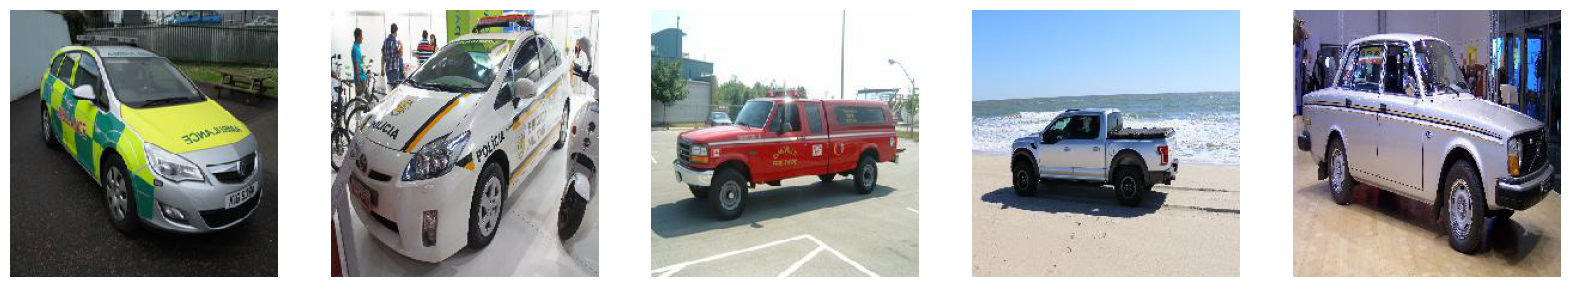

In [5]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

In [6]:
# normalizing the pixel values
X = X / X.max()

In [7]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X.astype('float32'),y,test_size=0.3, random_state=42)

In [8]:
# define vars

epochs = 10
batch_size = 128

# create model
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7), input_shape=(224,224,3), name='conv1'))
model.add(LeakyReLU(name='lrelu1'))
model.add(MaxPooling2D(pool_size=(4, 4), name='pool1'))
model.add(Conv2D(32, (7, 7), name='conv2'))
model.add(LeakyReLU(name='lrelu2'))
model.add(MaxPooling2D(pool_size=(4, 4), name='pool2'))
model.add(Conv2D(32, (7, 7), name='conv3'))
model.add(LeakyReLU(name='lrelu3'))
model.add(MaxPooling2D(pool_size=(4, 4), name='pool3'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid', name='preds'))

In [ ]:
# compile the model with necessary attribute
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid))

2023-11-28 18:36:30.031865: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 991076352 exceeds 10% of free system memory.


Epoch 1/10


2023-11-28 18:36:41.514814: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 778633216 exceeds 10% of free system memory.
2023-11-28 18:36:45.148361: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 778633216 exceeds 10% of free system memory.


 1/13 [=>............................] - ETA: 5:55 - loss: 0.7317 - accuracy: 0.3828

2023-11-28 18:37:05.494477: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 778633216 exceeds 10% of free system memory.
2023-11-28 18:37:07.508953: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 778633216 exceeds 10% of free system memory.


 8/13 [=================>............] - ETA: 1:46 - loss: 0.7030 - accuracy: 0.5430

## Attempt 1 - Understanding the Model Architecture 

In [14]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 218, 218, 32)      4736      
                                                                 
 lrelu1 (LeakyReLU)          (None, 218, 218, 32)      0         
                                                                 
 pool1 (MaxPooling2D)        (None, 54, 54, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 48, 48, 32)        50208     
                                                                 
 lrelu2 (LeakyReLU)          (None, 48, 48, 32)        0         
                                                                 
 pool2 (MaxPooling2D)        (None, 12, 12, 32)        0         
                                                                 
 conv3 (Conv2D)              (None, 6, 6, 32)          5

## Attempt 2 - Visualize Filters and Weights

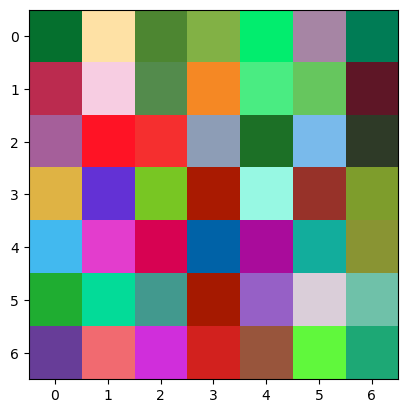

In [15]:
temp = model.get_layer('conv1').get_weights()[0][:, :, :, 0]
temp -= temp.min()
temp /= temp.max()
plt.imshow(temp)

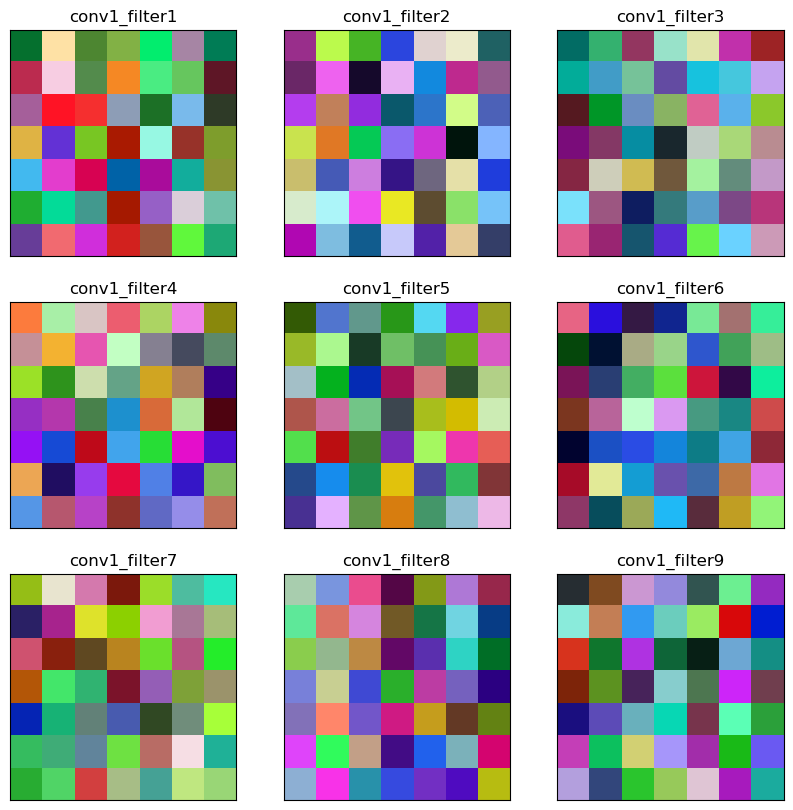

In [16]:
#plot the filters
fig,ax = plt.subplots(nrows=3,ncols=3, figsize=(10, 10))

filter_no = 1
for i in range(3):
    for j in range(3):
        temp = model.get_layer('conv1').get_weights()[0][:, :, :, filter_no - 1]
        temp -= temp.min()
        temp /= temp.max()
        ax[i][j].imshow(temp)
        ax[i][j].set_title('conv1' + '_filter' + str(filter_no))
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        filter_no += 1

### Attempt 3 - Extract Output of Intermediate Neurons/Layers

1/1 [==============================] - 1s 680ms/step


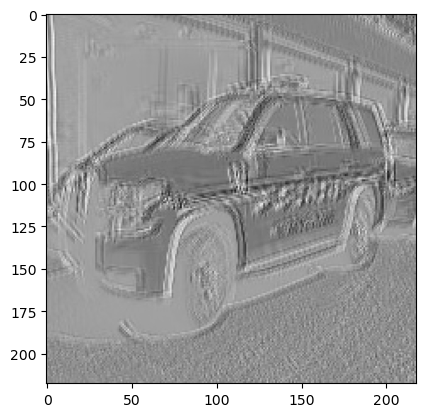

In [17]:
#importing required libraries and functions
from keras.models import Model


eg_image_idx = 5 #for example
image = X_train[eg_image_idx]

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer('conv1').output)
intermediate_output = intermediate_layer_model.predict(image)[0, :, :, 0]

plt.imshow(intermediate_output, cmap='gray')

1/1 [==============================] - 0s 38ms/step


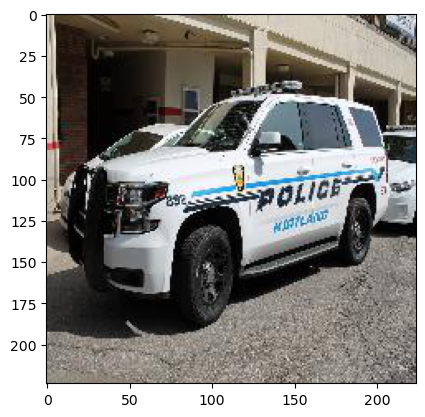

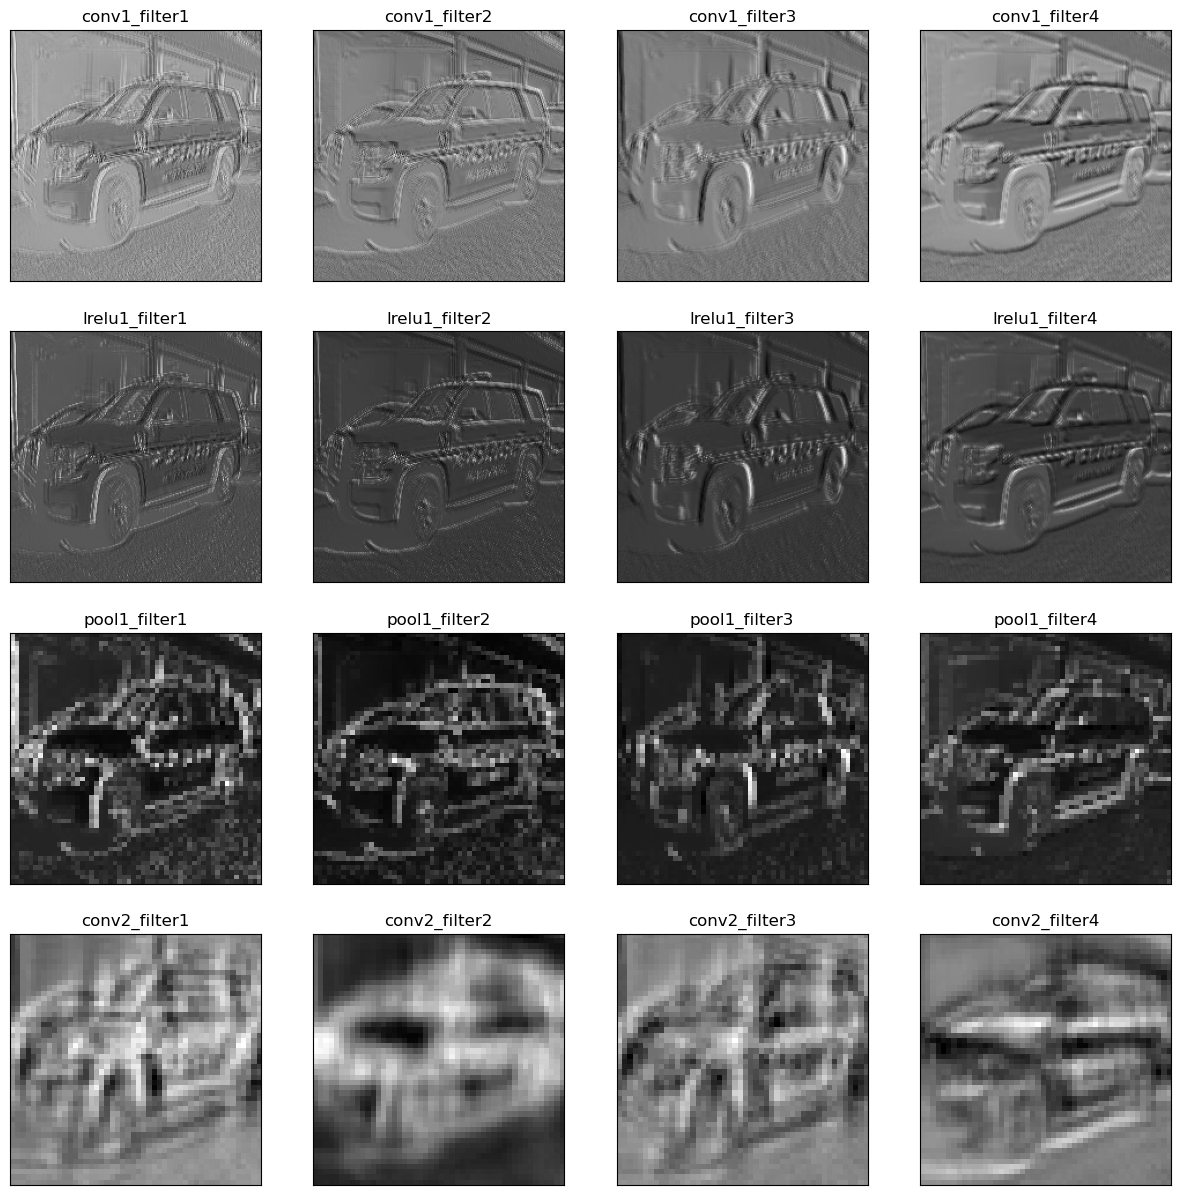

In [18]:
#defining names of layers from which we will take the output
layer_names = ['conv1','lrelu1','pool1', 'conv2']
outputs = []

eg_image_idx = 5 #for example
image = X_train[eg_image_idx]

plt.imshow(image)

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

#extracting the output and appending to outputs
for layer_name in layer_names:
    intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(image)
    outputs.append(intermediate_output)
    
#plotting the outputs
fig,ax = plt.subplots(nrows=len(outputs),ncols=4,figsize=(15,15))

for i in range(len(outputs)):
    for z in range(4):
        ax[i][z].imshow(outputs[i][0,:,:,z], cmap='gray')
        ax[i][z].set_title(layer_names[i] + '_filter' + str(z + 1))
        ax[i][z].set_xticks([])
        ax[i][z].set_yticks([])

### Attempt 4 - Locate Important parts of Image

Creating heatmap


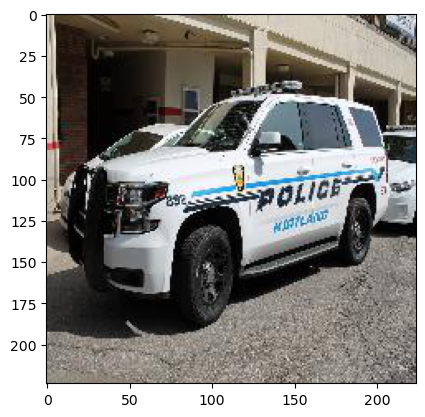

[None]

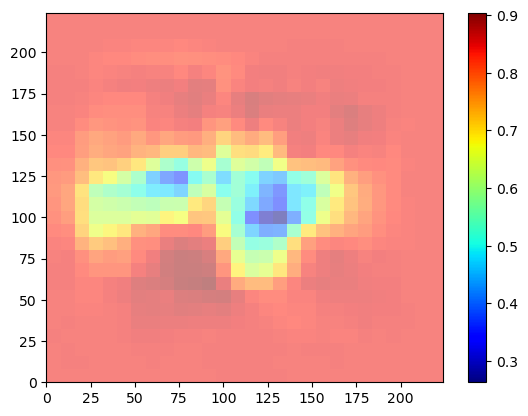

In [21]:
def iter_occlusion(image, size=4):
    # taken from https://www.kaggle.com/blargl/simple-occlusion-and-saliency-maps

   occlusion = np.full((size * 5, size * 5, 1), [0.5], np.float32)
   occlusion_center = np.full((size, size, 1), [0.5], np.float32)
   occlusion_padding = size * 2

   # print('padding...')
   image_padded = np.pad(image, ( \
   (occlusion_padding, occlusion_padding), (occlusion_padding, occlusion_padding), (0, 0) \
   ), 'constant', constant_values = 0.0)

   for y in range(occlusion_padding, image.shape[0] + occlusion_padding, size):

       for x in range(occlusion_padding, image.shape[1] + occlusion_padding, size):
           tmp = image_padded.copy()

           tmp[y - occlusion_padding:y + occlusion_center.shape[0] + occlusion_padding, \
             x - occlusion_padding:x + occlusion_center.shape[1] + occlusion_padding] \
             = occlusion

           tmp[y:y + occlusion_center.shape[0], x:x + occlusion_center.shape[1]] = occlusion_center

           yield x - occlusion_padding, y - occlusion_padding, \
             tmp[occlusion_padding:tmp.shape[0] - occlusion_padding, occlusion_padding:tmp.shape[1] - occlusion_padding]

# take example image
image = X_train[eg_image_idx]
correct_class = np.argmax(y_train[eg_image_idx])

# define variables to use
img_size = image.shape[0]
occlusion_size = 8
heatmap = np.zeros((img_size, img_size), np.float32)
class_pixels = np.zeros((img_size, img_size), np.int16)

from collections import defaultdict
counters = defaultdict(int)


print('Creating heatmap')
for n, (x, y, img_float) in enumerate(iter_occlusion(image, size=occlusion_size)):

    X = img_float.reshape(1, 224, 224, 3)
    out = model.predict(X, verbose=0)

    heatmap[y:y + occlusion_size, x:x + occlusion_size] = out[0][correct_class]
    class_pixels[y:y + occlusion_size, x:x + occlusion_size] = np.argmax(out)
    counters[np.argmax(out)] += 1

plt.imshow(image)

plt.show()


plt.pcolormesh(heatmap, cmap=plt.cm.jet, alpha=0.50)
plt.colorbar().solids.set(alpha=1)


In [31]:
# from vis.visualization import visualize_saliency
# from vis.utils import utils
# from keras import activations

# # Utility to search for layer index by name. 
# layer_idx = utils.find_layer_idx(model, 'preds')

# # Swap softmax with linear
# model.layers[layer_idx].activation = activations.linear
# model = utils.apply_modifications(model)

# grads = visualize_saliency(model, layer_idx, filter_indices=0, 
#                     seed_input=X_train[eg_image_idx], backprop_modifier='guided')
# plt.imshow(grads, cmap='jet')

In [27]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear, ExtractIntermediateLayer
from tf_keras_vis.utils.scores import CategoricalScore, BinaryScore
from tf_keras_vis.saliency import Saliency

In [28]:
saliency = Saliency(model, model_modifier=ReplaceToLinear(), clone=True)

In [29]:
saliency_map = saliency(BinaryScore(1.0), image, smooth_samples=20, smooth_noise=0.2)

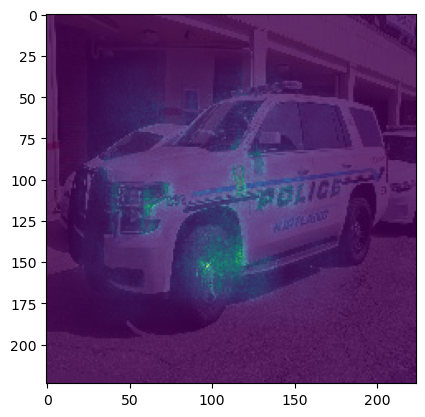

In [30]:
plt.imshow(X_train[5])
plt.imshow(saliency_map[0], alpha=0.8)